In [1]:
import spacy

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

print("SpaCy is ready! ✅")


SpaCy is ready! ✅


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\laifu\Desktop\SU 25spr\apple-sentiment-nlp\data\sample_ccall.csv", encoding="ISO-8859-1")



# Show first few rows
df.head()


,companyid,keydevid,transcriptid,headline,mostimportantdateutc,mostimportanttimeutc,keydeveventtypeid,keydeveventtypename,companyname,transcriptcollectiontypeid,...,transcriptcomponenttypeid,transcriptcomponenttypename,transcriptpersonid,transcriptpersonname,proid,companyofperson,speakertypeid,speakertypename,componenttextpreview,word_count
0,24937,2710235.0,135.0,"Apple Inc., Q3 2006 Earnings Call, Jul-19-2006",19JUL2006,21:00:00,48.0,Earnings Calls,Apple Inc.,6.0,...,1.0,Presentation Operator Message,1.0,Operator,NaN,NaN,1.0,Operator,"Good day, and welcome to this Apple Computer t...",48.0
1,24937,2710235.0,135.0,"Apple Inc., Q3 2006 Earnings Call, Jul-19-2006",19JUL2006,21:00:00,48.0,Earnings Calls,Apple Inc.,6.0,...,2.0,Presenter Speech,10581.0,Nancy Paxton,NaN,NaN,2.0,Executives,"Thank you. Good afternoon, and thanks to every...",195.0
2,24937,2710235.0,135.0,"Apple Inc., Q3 2006 Earnings Call, Jul-19-2006",19JUL2006,21:00:00,48.0,Earnings Calls,Apple Inc.,6.0,...,2.0,Presenter Speech,10627.0,Peter Oppenheimer,NaN,NaN,2.0,Executives,"Thank you, Nancy. Thank you for joining us. We...",1326.0
3,24937,2710235.0,135.0,"Apple Inc., Q3 2006 Earnings Call, Jul-19-2006",19JUL2006,21:00:00,48.0,Earnings Calls,Apple Inc.,6.0,...,7.0,Question and Answer Operator Message,1.0,Operator,NaN,NaN,1.0,Operator,Thank you.,NaN
4,(Operator Instructions),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.isnull().sum()

companyid                           557
keydevid                             33
transcriptid                        633
headline                            633
mostimportantdateutc                633
mostimportanttimeutc                633
keydeveventtypeid                   633
keydeveventtypename                 633
companyname                         633
transcriptcollectiontypeid          633
transcriptcollectiontypename        633
transcriptpresentationtypeid        633
transcriptpresentationtypename      633
transcriptcreationdate_utc          633
transcriptcreationtime_utc          633
audiolengthsec                     3024
transcriptcomponentid               633
componentorder                      633
transcriptcomponenttypeid           633
transcriptcomponenttypename         633
transcriptpersonid                  633
transcriptpersonname                633
proid                              7062
companyofperson                   16016
speakertypeid                       633


In [4]:
# Show all column names
print(df.columns)


Index(['companyid', 'keydevid', 'transcriptid', 'headline',
       'mostimportantdateutc', 'mostimportanttimeutc', 'keydeveventtypeid',
       'keydeveventtypename', 'companyname', 'transcriptcollectiontypeid',
       'transcriptcollectiontypename', 'transcriptpresentationtypeid',
       'transcriptpresentationtypename', 'transcriptcreationdate_utc',
       'transcriptcreationtime_utc', 'audiolengthsec', 'transcriptcomponentid',
       'componentorder', 'transcriptcomponenttypeid',
       'transcriptcomponenttypename', 'transcriptpersonid',
       'transcriptpersonname', 'proid', 'companyofperson', 'speakertypeid',
       'speakertypename', 'componenttextpreview', 'word_count'],
      dtype='object')


In [5]:
# Keep only relevant columns
df = df[['mostimportantdateutc', 'mostimportanttimeutc', 'transcriptpersonname', 'speakertypename', 'componenttextpreview']]

# Display the first few rows
df.head()


,mostimportantdateutc,mostimportanttimeutc,transcriptpersonname,speakertypename,componenttextpreview
0,19JUL2006,21:00:00,Operator,Operator,"Good day, and welcome to this Apple Computer t..."
1,19JUL2006,21:00:00,Nancy Paxton,Executives,"Thank you. Good afternoon, and thanks to every..."
2,19JUL2006,21:00:00,Peter Oppenheimer,Executives,"Thank you, Nancy. Thank you for joining us. We..."
3,19JUL2006,21:00:00,Operator,Operator,Thank you.
4,NaN,NaN,NaN,NaN,NaN


In [6]:
# Check missing values again
df.isnull().sum()



mostimportantdateutc    633
mostimportanttimeutc    633
transcriptpersonname    633
speakertypename         633
componenttextpreview    633
dtype: int64

In [7]:
# Check total number of rows
df.shape


(16956, 5)

In [8]:
# Show rows with missing values
df[df.isnull().any(axis=1)].head(10)


,mostimportantdateutc,mostimportanttimeutc,transcriptpersonname,speakertypename,componenttextpreview
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN
19,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN


In [9]:
# Drop rows where all values are NaN
df = df.dropna(how="all")

# Verify the shape after dropping
df.shape


(16323, 5)

In [10]:
# Check remaining missing values
df.isnull().sum()


mostimportantdateutc    0
mostimportanttimeutc    0
transcriptpersonname    0
speakertypename         0
componenttextpreview    0
dtype: int64

In [11]:
import spacy

# Load the SpaCy English model
nlp = spacy.load("en_core_web_sm")

# Function to clean text
def preprocess_text(text):
    doc = nlp(text)  # Process the text with SpaCy
    cleaned_tokens = [
        token.lemma_.lower()  # Lemmatize and lowercase
        for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space  # Remove stopwords, punctuation, spaces
    ]
    return " ".join(cleaned_tokens)  # Join tokens back into a string

# Apply preprocessing to the transcript text column
df["cleaned_text"] = df["componenttextpreview"].apply(preprocess_text)

# Display the first few rows
df[["componenttextpreview", "cleaned_text"]].head()


,componenttextpreview,cleaned_text
0,"Good day, and welcome to this Apple Computer t...",good day welcome apple computer quarter financ...
1,"Thank you. Good afternoon, and thanks to every...",thank good afternoon thank join speak today ap...
2,"Thank you, Nancy. Thank you for joining us. We...",thank nancy thank join pleased report second h...
3,Thank you.,thank
7,"If you could talk, to the extent you can, abou...",talk extent view balance year press release ta...


In [12]:
import sqlite3
from sqlalchemy import create_engine
# Create a database connection (this creates 'apple_sentiment.db' if it doesn't exist)
engine = create_engine('sqlite:///apple_sentiment.db')

# Save df_cleaned into SQL table
df.to_sql("cleaned_transcripts", con=engine, index=False, if_exists="replace")

print("✅ Data saved to SQL successfully.")


✅ Data saved to SQL successfully.


In [13]:
import pandas as pd

# Query the cleaned_transcripts table from the SQLite database
with engine.connect() as connection:
    result_df = pd.read_sql("SELECT * FROM cleaned_transcripts LIMIT 5;", connection)

# Display the first few rows from SQL
print("✅ Preview from SQL table:")
display(result_df)


✅ Preview from SQL table:


,mostimportantdateutc,mostimportanttimeutc,transcriptpersonname,speakertypename,componenttextpreview,cleaned_text
0,19JUL2006,21:00:00,Operator,Operator,"Good day, and welcome to this Apple Computer t...",good day welcome apple computer quarter financ...
1,19JUL2006,21:00:00,Nancy Paxton,Executives,"Thank you. Good afternoon, and thanks to every...",thank good afternoon thank join speak today ap...
2,19JUL2006,21:00:00,Peter Oppenheimer,Executives,"Thank you, Nancy. Thank you for joining us. We...",thank nancy thank join pleased report second h...
3,19JUL2006,21:00:00,Operator,Operator,Thank you.,thank
4,19JUL2006,21:00:00,Andrew Neff,Analysts,"If you could talk, to the extent you can, abou...",talk extent view balance year press release ta...


In [14]:
import pandas as pd

# Read from the SQL table into a DataFrame
df_cleaned = pd.read_sql("SELECT * FROM cleaned_transcripts;", con=engine)

# Preview the data
print("✅ Data loaded from SQL into df_cleaned:")
display(df_cleaned.head())


✅ Data loaded from SQL into df_cleaned:


,mostimportantdateutc,mostimportanttimeutc,transcriptpersonname,speakertypename,componenttextpreview,cleaned_text
0,19JUL2006,21:00:00,Operator,Operator,"Good day, and welcome to this Apple Computer t...",good day welcome apple computer quarter financ...
1,19JUL2006,21:00:00,Nancy Paxton,Executives,"Thank you. Good afternoon, and thanks to every...",thank good afternoon thank join speak today ap...
2,19JUL2006,21:00:00,Peter Oppenheimer,Executives,"Thank you, Nancy. Thank you for joining us. We...",thank nancy thank join pleased report second h...
3,19JUL2006,21:00:00,Operator,Operator,Thank you.,thank
4,19JUL2006,21:00:00,Andrew Neff,Analysts,"If you could talk, to the extent you can, abou...",talk extent view balance year press release ta...


In [15]:
import pandas as pd


# Display the first few rows
df_cleaned.head()


#note meeting
#stop words, implement my own mini version of words. write a words document report. 

,mostimportantdateutc,mostimportanttimeutc,transcriptpersonname,speakertypename,componenttextpreview,cleaned_text
0,19JUL2006,21:00:00,Operator,Operator,"Good day, and welcome to this Apple Computer t...",good day welcome apple computer quarter financ...
1,19JUL2006,21:00:00,Nancy Paxton,Executives,"Thank you. Good afternoon, and thanks to every...",thank good afternoon thank join speak today ap...
2,19JUL2006,21:00:00,Peter Oppenheimer,Executives,"Thank you, Nancy. Thank you for joining us. We...",thank nancy thank join pleased report second h...
3,19JUL2006,21:00:00,Operator,Operator,Thank you.,thank
4,19JUL2006,21:00:00,Andrew Neff,Analysts,"If you could talk, to the extent you can, abou...",talk extent view balance year press release ta...


In [16]:
!pip install transformers


In [17]:
import torch
print(torch.cuda.is_available())  # Should print True
print(torch.cuda.device_count())  # Should print 1 (or more if you have multiple GPUs)
print(torch.cuda.get_device_name(0))  # Should print 'NVIDIA RTX 4090'


True
1
NVIDIA GeForce RTX 4090


In [18]:
import torch
print(torch.__version__)  # Should print the installed PyTorch version
print(torch.cuda.is_available())  # Should print True


2.5.1+cu121
True


In [19]:
from transformers import is_torch_available
print("Is PyTorch available in transformers?", is_torch_available())


Is PyTorch available in transformers? True


In [27]:
#!pip install tf-keras


In [29]:
from transformers import pipeline

# Load the sentiment analysis pipeline
sentiment_model = pipeline("sentiment-analysis")

# Test on a sample sentence
print(sentiment_model("The company's performance has been outstanding this quarter!"))


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9998581409454346}]


In [31]:
# Filter dataset for only Tim Cook's statements
tim_cook_df = df_cleaned[df_cleaned["transcriptpersonname"] == "Tim Cook"]

# Display the first few rows
tim_cook_df.head()


,mostimportantdateutc,mostimportanttimeutc,transcriptpersonname,speakertypename,componenttextpreview,cleaned_text
10,19JUL2006,21:00:00,Tim Cook,Executives,"As Peter said earlier, the component pricing w...",peter say early component pricing favorable q3...
16,19JUL2006,21:00:00,Tim Cook,Executives,"In terms of what we saw across the quarter, on...",term see quarter announce macbook begin ship s...
56,19JUL2006,21:00:00,Tim Cook,Executives,"In regards to the MacBook, we shipped a signif...",regard macbook ship significant number macbook...
61,19JUL2006,21:00:00,Tim Cook,Executives,It was not significant.,significant
70,19JUL2006,21:00:00,Tim Cook,Executives,"Rebecca, the main one that we are running righ...",rebecca main run right bestbuy store half appl...


In [33]:
# Apply sentiment analysis to Tim Cook's statements
tim_cook_df.loc[:, "sentiment"] = tim_cook_df["cleaned_text"].apply(lambda text: sentiment_model(text)[0])


# Split sentiment into label and score
tim_cook_df["sentiment_label"] = tim_cook_df["sentiment"].apply(lambda x: x["label"])
tim_cook_df["sentiment_score"] = tim_cook_df["sentiment"].apply(lambda x: x["score"])

# Display the results
tim_cook_df[["cleaned_text", "sentiment_label", "sentiment_score"]].head()


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
C:\Users\laifu\AppData\Local\Temp\ipykernel_56652\3775728794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tim_cook_df.loc[:, "sentiment"] = tim_cook_df["cleaned_text"].apply(lambda text: sentiment_model(text)[0])
C:\Users\laifu\AppData\Local\Temp\ipykernel_56652\3775728794.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tim_cook_df["sentiment_label"] = tim_cook_df["sentiment"].apply(lambda

,cleaned_text,sentiment_label,sentiment_score
10,peter say early component pricing favorable q3...,POSITIVE,0.986087
16,term see quarter announce macbook begin ship s...,NEGATIVE,0.994600
56,regard macbook ship significant number macbook...,POSITIVE,0.773026
61,significant,POSITIVE,0.999787
70,rebecca main run right bestbuy store half appl...,NEGATIVE,0.995480


In [35]:
executives_df = df_cleaned[df_cleaned["speakertypename"] == "Executives"]


In [37]:
# Ensure cleaned_text is a string and remove NaN values
executives_df = executives_df.dropna(subset=["cleaned_text"])  # Drop NaN rows
executives_df = executives_df[executives_df["cleaned_text"].str.strip() != ""]  # Remove empty strings
executives_df["cleaned_text"] = executives_df["cleaned_text"].astype(str)  # Convert everything to string


In [39]:
executives_df.loc[:, "sentiment"] = executives_df["cleaned_text"].apply(lambda text: sentiment_model(text)[0])
executives_df.loc[:, "sentiment_label"] = executives_df["sentiment"].apply(lambda x: x["label"])
executives_df.loc[:, "sentiment_score"] = executives_df["sentiment"].apply(lambda x: x["score"])


In [41]:
executives_df[["cleaned_text", "sentiment_label", "sentiment_score"]].head()

,cleaned_text,sentiment_label,sentiment_score
1,thank good afternoon thank join speak today ap...,POSITIVE,0.999519
2,thank nancy thank join pleased report second h...,POSITIVE,0.999432
5,andy know talk unannounced product limit tell ...,POSITIVE,0.662090
6,thank andy question,POSITIVE,0.999160
9,start generally tim provide color commodity en...,NEGATIVE,0.967484


In [43]:
# Drop the dict-based 'sentiment' column before saving
executives_df_cleaned = executives_df.drop(columns=["sentiment"])

# Save to SQL
executives_df_cleaned.to_sql("executives_sentiment", con=engine, index=False, if_exists="replace")

print("✅ Executives sentiment data saved to SQL successfully.")


✅ Executives sentiment data saved to SQL successfully.


In [45]:
import pandas as pd
from sqlalchemy import create_engine

# Connect to the SQLite database
engine = create_engine('sqlite:///apple_sentiment.db')

# Load the 'executives_sentiment' table into a DataFrame
executives_df_cleaned = pd.read_sql("SELECT * FROM executives_sentiment", con=engine)

# Show first few rows
executives_df_cleaned.head()


,mostimportantdateutc,mostimportanttimeutc,transcriptpersonname,speakertypename,componenttextpreview,cleaned_text,sentiment_label,sentiment_score
0,19JUL2006,21:00:00,Nancy Paxton,Executives,"Thank you. Good afternoon, and thanks to every...",thank good afternoon thank join speak today ap...,POSITIVE,0.999519
1,19JUL2006,21:00:00,Peter Oppenheimer,Executives,"Thank you, Nancy. Thank you for joining us. We...",thank nancy thank join pleased report second h...,POSITIVE,0.999432
2,19JUL2006,21:00:00,Peter Oppenheimer,Executives,"Andy, you know that we do not talk about unann...",andy know talk unannounced product limit tell ...,POSITIVE,0.662090
3,19JUL2006,21:00:00,Nancy Paxton,Executives,"Thanks, Andy. Could we have the next question ...",thank andy question,POSITIVE,0.999160
4,19JUL2006,21:00:00,Peter Oppenheimer,Executives,"I will start generally, and Tim can provide so...",start generally tim provide color commodity en...,NEGATIVE,0.967484


In [47]:
import spacy
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

# Add custom stopwords to default list
custom_stopwords = ENGLISH_STOP_WORDS.union({
    'thank', 'apple', 'nancy', 'andy', 'peter', 'cook',  # you can add names or any irrelevant frequent terms
    'company', 'quarter', 'fiscal', 'financial', 'million', 'billion'
})

# Define the new cleaner function
def clean_text_with_custom_stopwords(text):
    doc = nlp(text)
    tokens = [
        token.lemma_.lower() for token in doc
        if token.lemma_.lower() not in custom_stopwords
        and not token.is_punct
        and not token.is_space
    ]
    return " ".join(tokens)

# Apply it to original text column (or cleaned_text if you prefer)
executives_df_cleaned["recleaned_text"] = executives_df_cleaned["componenttextpreview"].apply(clean_text_with_custom_stopwords)

# Preview the new result
executives_df_cleaned[["componenttextpreview", "recleaned_text"]].head()


,componenttextpreview,recleaned_text
0,"Thank you. Good afternoon, and thanks to every...",good afternoon join speak today 's cfo oppenhe...
1,"Thank you, Nancy. Thank you for joining us. We...",join pleased report second high quarterly reve...
2,"Andy, you know that we do not talk about unann...",know talk unannounced product really limit say...
3,"Thanks, Andy. Could we have the next question ...",question
4,"I will start generally, and Tim can provide so...",start generally tim provide color commodity en...


In [49]:
from transformers import pipeline

# Load the sentiment analysis model
sentiment_model = pipeline("sentiment-analysis")

# Analyze original text sentiment
executives_df_cleaned["original_sentiment"] = executives_df_cleaned["componenttextpreview"].apply(lambda x: sentiment_model(x)[0]["label"])
executives_df_cleaned["original_score"] = executives_df_cleaned["componenttextpreview"].apply(lambda x: sentiment_model(x)[0]["score"])

# Analyze cleaned text sentiment
executives_df_cleaned["cleaned_sentiment"] = executives_df_cleaned["cleaned_text"].apply(lambda x: sentiment_model(x)[0]["label"])
executives_df_cleaned["cleaned_score"] = executives_df_cleaned["cleaned_text"].apply(lambda x: sentiment_model(x)[0]["score"])

# Compare sentiment changes
executives_df_cleaned["sentiment_changed"] = executives_df_cleaned["original_sentiment"] != executives_df_cleaned["cleaned_sentiment"]
executives_df_cleaned["score_diff"] = executives_df_cleaned["cleaned_score"] - executives_df_cleaned["original_score"]

# Summary statistics
print("Number of rows with changed sentiment labels:", executives_df_cleaned["sentiment_changed"].sum())
print("Average score difference:", executives_df_cleaned["score_diff"].mean())

# View top rows with changed sentiment
executives_df_cleaned[executives_df_cleaned["sentiment_changed"]].head(10)[[
    "componenttextpreview", 
    "cleaned_text", 
    "original_sentiment", 
    "cleaned_sentiment", 
    "original_score", 
    "cleaned_score"
]]


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


Number of rows with changed sentiment labels: 1816
Average score difference: -0.018377246208637895


,componenttextpreview,cleaned_text,original_sentiment,cleaned_sentiment,original_score,cleaned_score
2,"Andy, you know that we do not talk about unann...",andy know talk unannounced product limit tell ...,NEGATIVE,POSITIVE,0.715795,0.662090
4,"I will start generally, and Tim can provide so...",start generally tim provide color commodity en...,POSITIVE,NEGATIVE,0.978761,0.967484
7,We will let Tim talk a little bit about some o...,let tim talk little bit market gary thought ec...,POSITIVE,NEGATIVE,0.999293,0.992839
8,"In terms of what we saw across the quarter, on...",term see quarter announce macbook begin ship s...,POSITIVE,NEGATIVE,0.993081,0.994600
9,I am going to speak a little bit more generall...,go speak little bit generally datum see u.s. e...,POSITIVE,NEGATIVE,0.998966,0.987649
12,"Yes, units, Keith, for Macs in retail were up ...",yes unit keith macs retail 40 year year respon...,POSITIVE,NEGATIVE,0.999373,0.990850
20,We have not announced the ship dates for Leopa...,announce ship date leopard developers conferen...,POSITIVE,NEGATIVE,0.999036,0.576902
26,"In regards to the MacBook, we shipped a signif...",regard macbook ship significant number macbook...,NEGATIVE,POSITIVE,0.999208,0.773026
28,It was not significant.,significant,NEGATIVE,POSITIVE,0.999778,0.999787
33,Not with a major partner. We have some select ...,major partner select thing small nature,POSITIVE,NEGATIVE,0.643867,0.883548


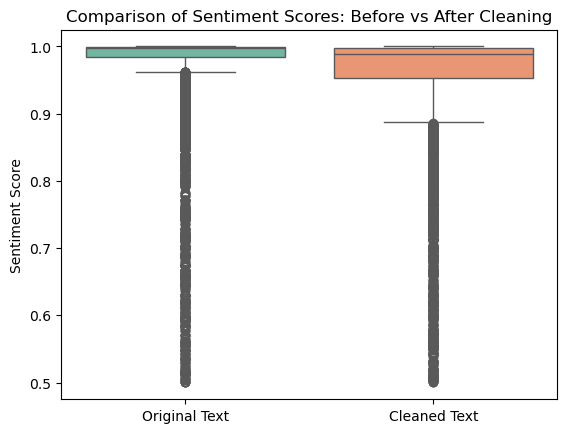

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot comparing sentiment scores before and after cleaning
sns.boxplot(data=executives_df_cleaned[['original_score', 'cleaned_score']], palette='Set2')
plt.title("Comparison of Sentiment Scores: Before vs After Cleaning")
plt.ylabel("Sentiment Score")
plt.xticks([0, 1], ["Original Text", "Cleaned Text"])
plt.show()


C:\Users\laifu\AppData\Local\Temp\ipykernel_56652\3189511335.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  executives_df_cleaned['date'] = pd.to_datetime(executives_df_cleaned['mostimportantdateutc'])


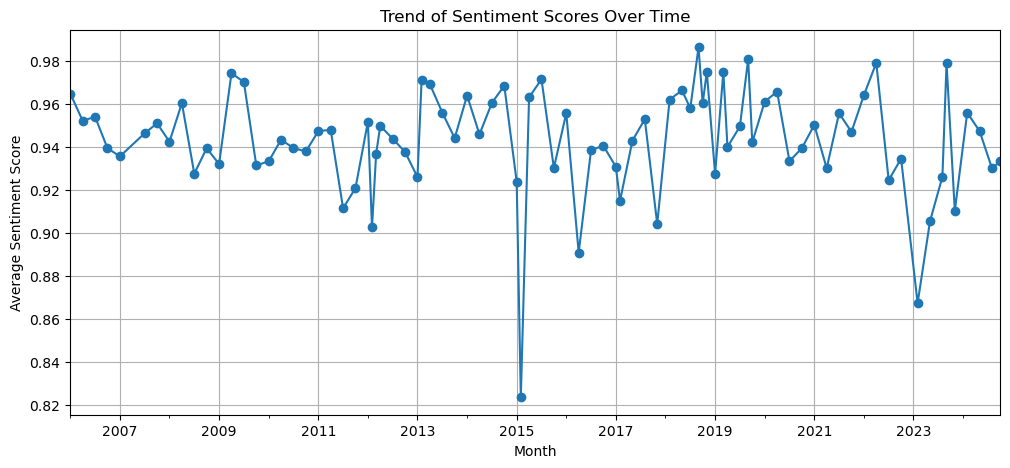

In [53]:
import matplotlib.pyplot as plt

# Ensure the date column is in datetime format
executives_df_cleaned['date'] = pd.to_datetime(executives_df_cleaned['mostimportantdateutc'])

# Calculate average sentiment score per month
monthly_sentiment = executives_df_cleaned.groupby(executives_df_cleaned['date'].dt.to_period("M"))['cleaned_score'].mean()

# Plot the trend over time
monthly_sentiment.plot(kind='line', marker='o', figsize=(12, 5), title="Trend of Sentiment Scores Over Time")
plt.ylabel("Average Sentiment Score")
plt.xlabel("Month")
plt.grid()
plt.show()


C:\Users\laifu\AppData\Local\Temp\ipykernel_56652\287843875.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  executives_df_cleaned["date"] = pd.to_datetime(executives_df_cleaned["mostimportantdateutc"])


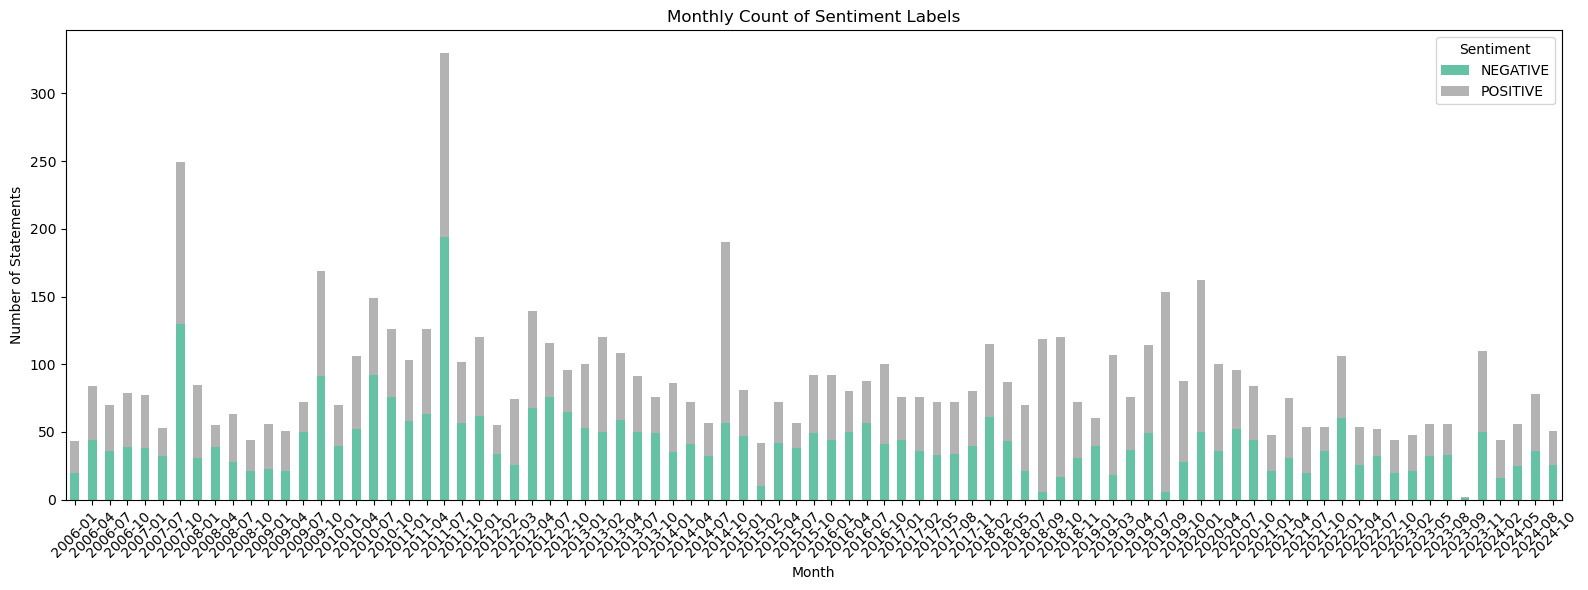

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure date is in datetime format
executives_df_cleaned["date"] = pd.to_datetime(executives_df_cleaned["mostimportantdateutc"])

# Create a new column for the month
executives_df_cleaned["month"] = executives_df_cleaned["date"].dt.to_period("M").astype(str)

# Group by month and sentiment label, then count
monthly_sentiment_counts = executives_df_cleaned.groupby(["month", "sentiment_label"]).size().unstack(fill_value=0)

# Plot
monthly_sentiment_counts.plot(kind="bar", stacked=True, figsize=(16, 6), colormap="Set2")

plt.title("Monthly Count of Sentiment Labels")
plt.xlabel("Month")
plt.ylabel("Number of Statements")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


C:\Users\laifu\AppData\Local\Temp\ipykernel_56652\520957293.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  executives_df_cleaned['date'] = pd.to_datetime(executives_df_cleaned['mostimportantdateutc'])


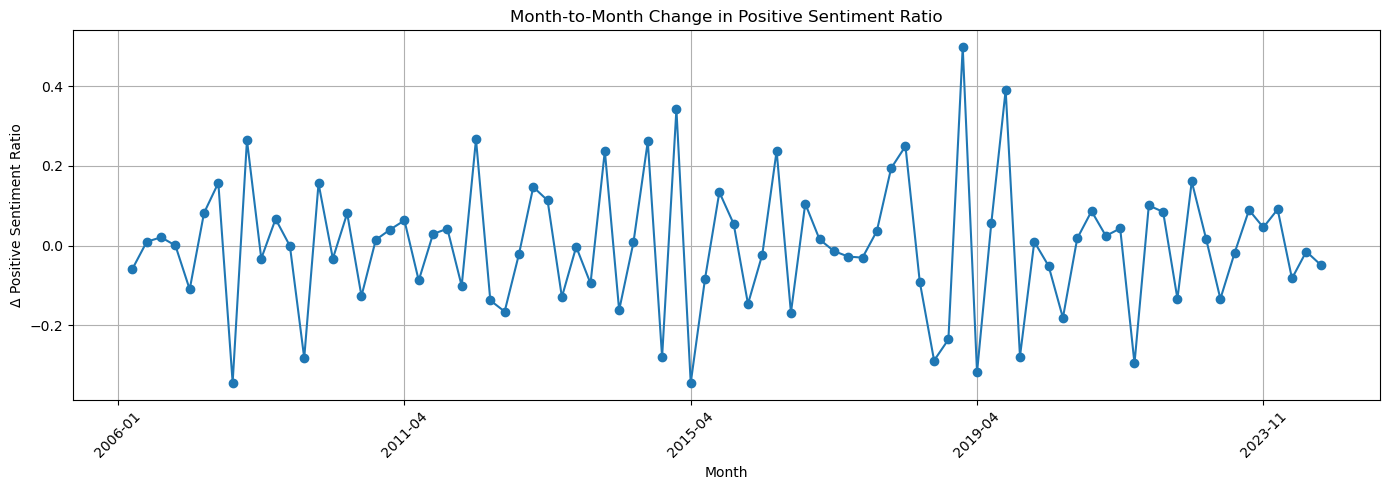

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Make sure your date column is datetime
executives_df_cleaned['date'] = pd.to_datetime(executives_df_cleaned['mostimportantdateutc'])

# Extract Year-Month
executives_df_cleaned['Month'] = executives_df_cleaned['date'].dt.to_period('M').astype(str)

# Group by Month and Sentiment to get counts
monthly_counts = executives_df_cleaned.groupby(['Month', 'sentiment_label']).size().reset_index(name='Count')

# Pivot so we get POSITIVE and NEGATIVE as columns
monthly_sentiment_ratio = monthly_counts.pivot_table(index='Month', columns='sentiment_label', values='Count', fill_value=0)

# Calculate positive ratio per month
monthly_sentiment_ratio['Positive_Ratio'] = monthly_sentiment_ratio['POSITIVE'] / (
    monthly_sentiment_ratio['POSITIVE'] + monthly_sentiment_ratio['NEGATIVE']
)

# Calculate month-to-month change
monthly_counts_diff = monthly_sentiment_ratio['Positive_Ratio'].diff()

# Plot the difference
plt.figure(figsize=(14, 5))
monthly_counts_diff.plot(marker='o')
plt.title("Month-to-Month Change in Positive Sentiment Ratio")
plt.ylabel("Δ Positive Sentiment Ratio")
plt.xlabel("Month")
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
